In [79]:
import os 
import librosa 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile
import librosa.display
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# Defining paths for raw and processed data
RAW_DATA_PATH = Path('data/raw')
PROCESSED_DATA_PATH = Path('data/processed')

# Creating directories
RAW_DATA_PATH.mkdir(parents=True, exist_ok=True)
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)

print(f"Raw data path exists: {RAW_DATA_PATH.exists()}")
print(f"Processed data path exists: {PROCESSED_DATA_PATH.exists()}")

Raw data path exists: True
Processed data path exists: True


In [80]:
# Defining the path to the zip file
zip_path = Path('C:/Users/aldhu/VCFAD/data/raw/TIMIT.zip')

# Defining the destination directory for the unzipped files
extract_path = zip_path.parent / 'TIMIT'

# Unzip the dataset into the 'TIMIT' subdirectory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


In [42]:
# Listing files in the TIMIT directory to verify the download
timit_files = list(extract_path.glob('**/*'))
print(f"Total files in TIMIT dataset: {len(timit_files)}")

Total files in TIMIT dataset: 25863


In [43]:
def print_directory_structure(data_path, max_depth=3, current_depth=0):

    if current_depth > max_depth:
        return

    indent = '    ' * current_depth
    print(f"{indent}{data_path.name}/")

    # Iterate through files and directories
    if data_path.is_dir():
        for item in data_path.iterdir():
            if item.is_dir():
                print_directory_structure(item, max_depth, current_depth + 1)
            else:
                print(f"{indent}    {item.name}")

# Defining the path to the TIMIT dataset
timit_path = Path('C:/Users/aldhu/VCFAD/data/raw/TIMIT')

# Printing the directory structure of the TIMIT dataset
print_directory_structure(timit_path)

TIMIT/
    data/
        lisa/
            data/


In [44]:
def load_audio_files(data_path, file_extension=".wav"):
    
    audio_files = []
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith(file_extension):
                file_path = os.path.join(root, file)
                try:
                    audio, sr = librosa.load(file_path, sr=16000)  # Standardize to 16 kHz
                    audio_files.append((audio, sr, file_path))
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return audio_files

# Loading TIMIT audio data
timit_audio_files = load_audio_files('C:/Users/aldhu/VCFAD/data/raw/TIMIT')
print(f"Loaded {len(timit_audio_files)} TIMIT audio files.")

Loaded 0 TIMIT audio files.


In [45]:
def load_audio_files(data_path, file_extension=".WAV"):
    
    audio_files = []
    # Using os.walk to recursively go through all subdirectories
    for root, _, files in os.walk(data_path):
        for file in files:
            if file.endswith(file_extension):
                file_path = os.path.join(root, file)
                try:
                    # Loading audio file with a standardized sample rate of 16 kHz
                    audio, sr = librosa.load(file_path, sr=16000)
                    audio_files.append((audio, sr, file_path))
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    return audio_files

# Defining the correct paths to the TIMIT dataset's TRAIN and TEST directories
train_path = Path(r'C:/Users/aldhu/VCFAD/data/raw/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN')
test_path = Path(r'C:/Users/aldhu/VCFAD/data/raw/TIMIT/data/lisa/data/timit/raw/TIMIT/TEST')

# Loading TIMIT audio data from the 'TRAIN' directory
train_audio_files = load_audio_files(train_path)
print(f"Loaded {len(train_audio_files)} TIMIT audio files from the TRAIN directory.")

# Loading TIMIT audio data from the 'TEST' directory
test_audio_files = load_audio_files(test_path)
print(f"Loaded {len(test_audio_files)} TIMIT audio files from the TEST directory.")

Loaded 4620 TIMIT audio files from the TRAIN directory.
Loaded 1680 TIMIT audio files from the TEST directory.


In [46]:
# Displing information about the first few loaded files from the TRAIN set
print("Training Data Samples:")
for i, (audio, sr, file_path) in enumerate(train_audio_files[:3]):  # Print the first 3 files
    print(f"File {i+1}: {file_path}")
    print(f" - Audio Length: {len(audio)} samples")
    print(f" - Sample Rate: {sr} Hz")

# Displaying information about the first few loaded files from the TEST set
print("\nTesting Data Samples:")
for i, (audio, sr, file_path) in enumerate(test_audio_files[:3]):  # Print the first 3 files
    print(f"File {i+1}: {file_path}")
    print(f" - Audio Length: {len(audio)} samples")
    print(f" - Sample Rate: {sr} Hz")

Training Data Samples:
File 1: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN\DR1\FCJF0\SA1.WAV
 - Audio Length: 46797 samples
 - Sample Rate: 16000 Hz
File 2: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN\DR1\FCJF0\SA2.WAV
 - Audio Length: 34509 samples
 - Sample Rate: 16000 Hz
File 3: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN\DR1\FCJF0\SI1027.WAV
 - Audio Length: 49460 samples
 - Sample Rate: 16000 Hz

Testing Data Samples:
File 1: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TEST\DR1\FAKS0\SA1.WAV
 - Audio Length: 63488 samples
 - Sample Rate: 16000 Hz
File 2: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TEST\DR1\FAKS0\SA2.WAV
 - Audio Length: 58061 samples
 - Sample Rate: 16000 Hz
File 3: C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\data\timit\raw\TIMIT\TEST\DR1\FAKS0\SI1573.WAV
 - Audio Length: 79565 samples
 - Sample Rate: 16000 Hz


Visualizing Raw Training Data:


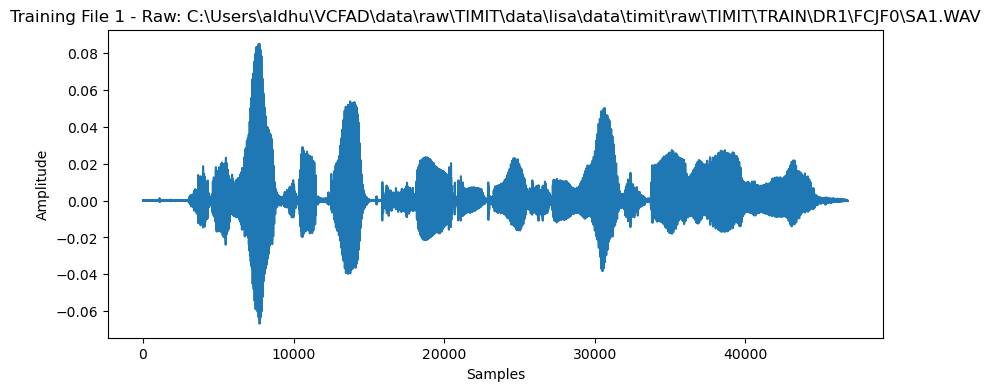

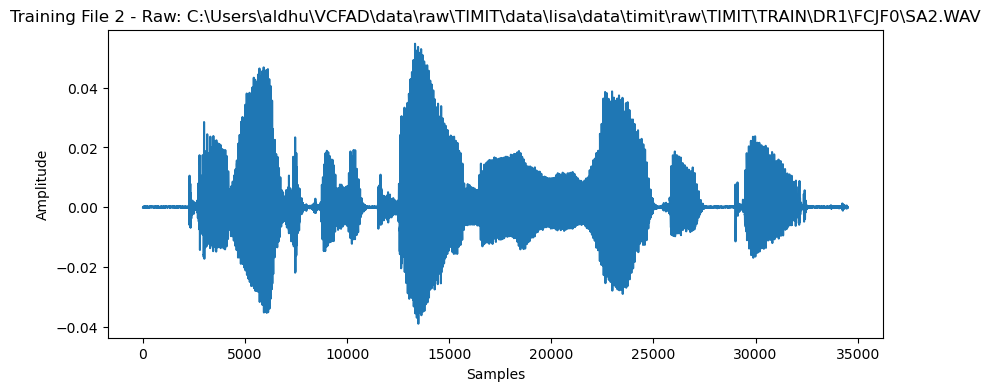

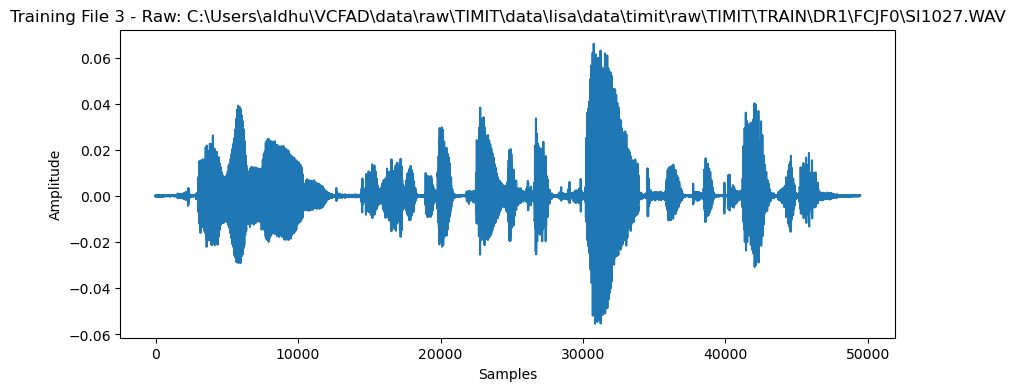

Visualizing Raw Training Data Spectrograms:


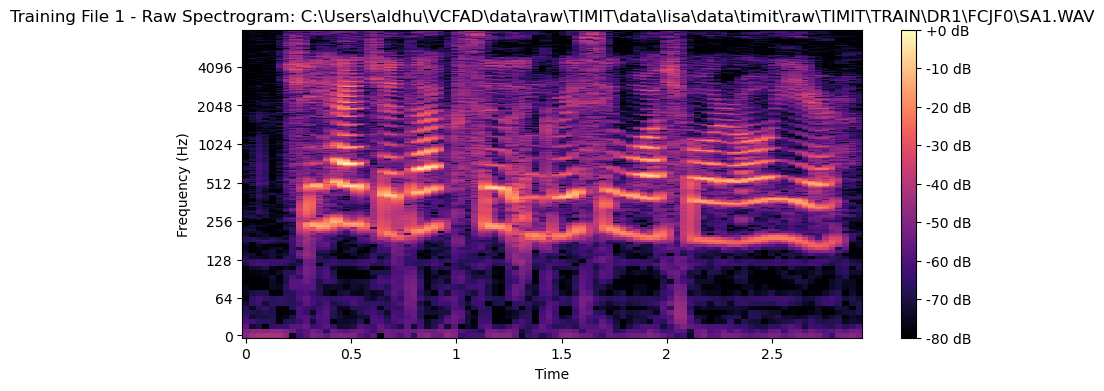

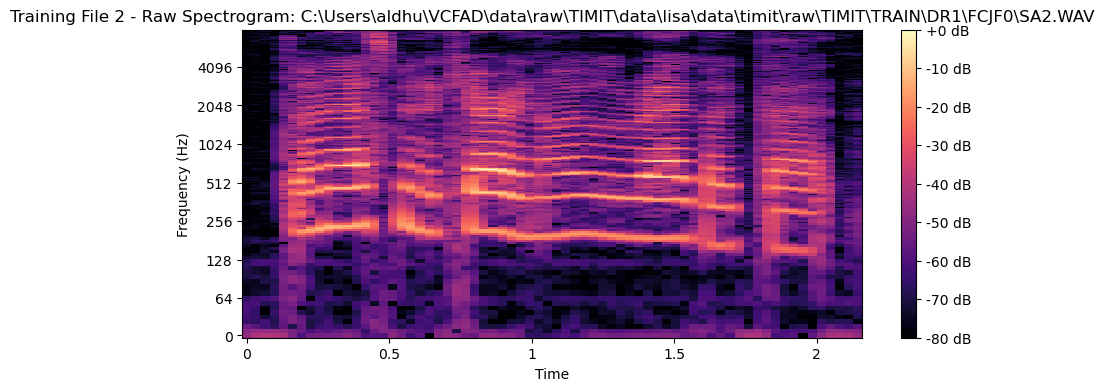

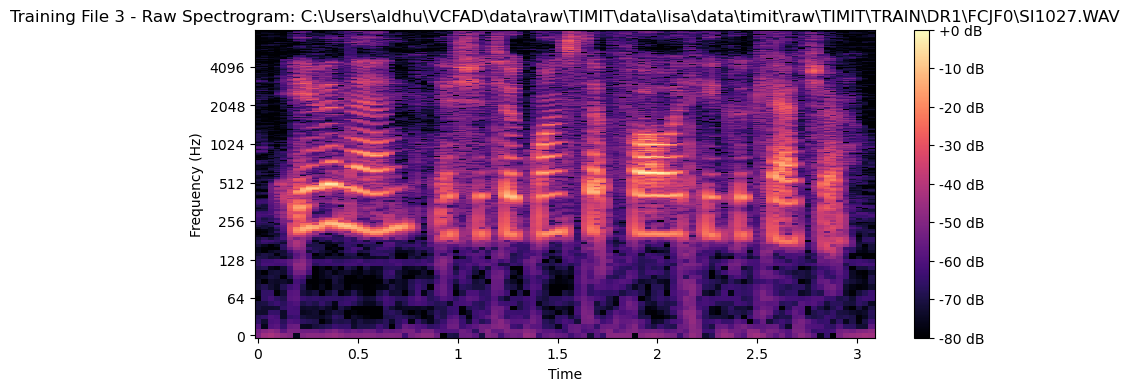

In [54]:
def plot_waveform(audio_data, title="Waveform"):
    """
    Plotting the waveform of an audio file.

    Args:
    - audio_data (tuple): A tuple containing (audio data, sample rate, file path).
    - title (str): Title of the plot.
    """
    audio, sr, file_path = audio_data
    plt.figure(figsize=(10, 4))
    plt.plot(audio)
    plt.title(f"{title}: {file_path}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()

# Visualizing raw data (before preprocessing)
print("Visualizing Raw Training Data:")
for i in range(3):
    plot_waveform(train_audio_files[i], title=f"Training File {i+1} - Raw")

def plot_spectrogram(audio_data, title="Spectrogram"):
    """
    Plot the spectrogram of an audio file.

    Args:
    - audio_data (tuple): A tuple containing (audio data, sample rate, file path).
    - title (str): Title of the plot.
    """
    audio, sr, file_path = audio_data
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{title}: {file_path}")
    plt.xlabel("Time")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Visualizing raw data spectrograms (before preprocessing)
print("Visualizing Raw Training Data Spectrograms:")
for i in range(3):
    plot_spectrogram(train_audio_files[i], title=f"Training File {i+1} - Raw Spectrogram")

In [55]:
def extract_mfcc_features(audio_data, n_mfcc=13):
    """
    Extracting MFCC features from loaded audio data.

    Args:
    - audio_data (list): A list of tuples containing (audio data, sample rate, file path).
    - n_mfcc (int): Number of MFCC features to extract. Default is 13.
    
    Returns:
    - features (list): A list of tuples containing (MFCC features, file path).
    """
    features = []
    for audio, sr, file_path in audio_data:
        # Extracting MFCCs from the audio file
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        features.append((mfcc, file_path))
    return features

# Extracting MFCC features from the TRAIN and TEST datasets
train_features = extract_mfcc_features(train_audio_files)
print(f"Extracted MFCC features from {len(train_features)} TRAIN audio files.")

test_features = extract_mfcc_features(test_audio_files)
print(f"Extracted MFCC features from {len(test_features)} TEST audio files.")

Extracted MFCC features from 4620 TRAIN audio files.
Extracted MFCC features from 1680 TEST audio files.


In [58]:
def normalize_features(features):
    """
    Normalizing extracted MFCC features using StandardScaler.

    Args:
    - features (list): A list of tuples containing (MFCC features, file path).

    Returns:
    - normalized_features (list): A list of tuples containing (normalized MFCC features, file path).
    """
    # Initializing the StandardScaler for normalization
    scaler = StandardScaler()

    # List to store normalized features
    normalized_features = []

    # Loop over each set of MFCC features
    for mfcc, file_path in features:
        # Apply normalization to each set of MFCC features
        # .T and .T again to transpose back, ensuring features are scaled correctly per coefficient
        mfcc_normalized = scaler.fit_transform(mfcc.T).T  
        # Append the normalized MFCC features and corresponding file path
        normalized_features.append((mfcc_normalized, file_path))

    return normalized_features

# Normalizing the extracted MFCC features for both TRAIN and TEST datasets
train_features_normalized = normalize_features(train_features)
print(f"Normalized features for {len(train_features_normalized)} TRAIN audio files.")

test_features_normalized = normalize_features(test_features)
print(f"Normalized features for {len(test_features_normalized)} TEST audio files.")

print("Normalization of features completed successfully.")

Normalized features for 4620 TRAIN audio files.
Normalized features for 1680 TEST audio files.
Normalization of features completed successfully.


In [64]:
# Defining the path to save processed data
PROCESSED_DATA_PATH = Path('C:/Users/aldhu/VCFAD/data/processed')

# Ensuring the processed data directory exists, create it if it doesn't
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)

# Saving the normalized training features using pickle
with open(PROCESSED_DATA_PATH / 'train_features_normalized.pkl', 'wb') as f:
    pickle.dump(train_features_normalized, f)

# Saving the normalized testing features using pickle
with open(PROCESSED_DATA_PATH / 'test_features_normalized.pkl', 'wb') as f:
    pickle.dump(test_features_normalized, f)

print("Preprocessed data saved successfully in .pkl format.")

Preprocessed data saved successfully in .pkl format.


In [66]:
# Loading the saved normalized training features for verification
with open(PROCESSED_DATA_PATH / 'train_features_normalized.pkl', 'rb') as f:
    loaded_train_features = pickle.load(f)

# Loading the saved normalized testing features for verification
with open(PROCESSED_DATA_PATH / 'test_features_normalized.pkl', 'rb') as f:
    loaded_test_features = pickle.load(f)

print(f"Loaded {len(loaded_train_features)} TRAIN features from saved file.")
print(f"Loaded {len(loaded_test_features)} TEST features from saved file.")

Loaded 4620 TRAIN features from saved file.
Loaded 1680 TEST features from saved file.


In [68]:
def extract_mel_spectrogram(audio_data, sample_rate=16000, n_mels=80, n_fft=1024, hop_length=256):
    """
    Extracting mel-spectrogram from audio data.

    Args:
    - audio_data (list): A list of tuples containing (audio data, sample rate, file path).
    - sample_rate (int): Sample rate of the audio data.
    - n_mels (int): Number of mel bands to generate.
    - n_fft (int): Number of FFT components.
    - hop_length (int): Number of samples between successive frames.

    Returns:
    - mel_spectrograms (list): A list of tuples containing (mel-spectrogram, file path).
    """
    mel_spectrograms = []
    for audio, sr, file_path in audio_data:
        # Convert to mel-spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        mel_spectrograms.append((mel_spectrogram, file_path))
    return mel_spectrograms

# Extracting mel-spectrograms for the training data
train_mel_spectrograms = extract_mel_spectrogram(train_audio_files)

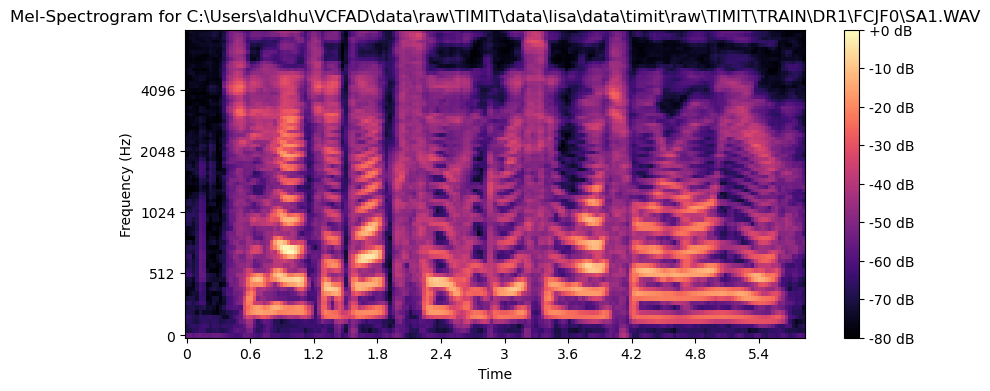

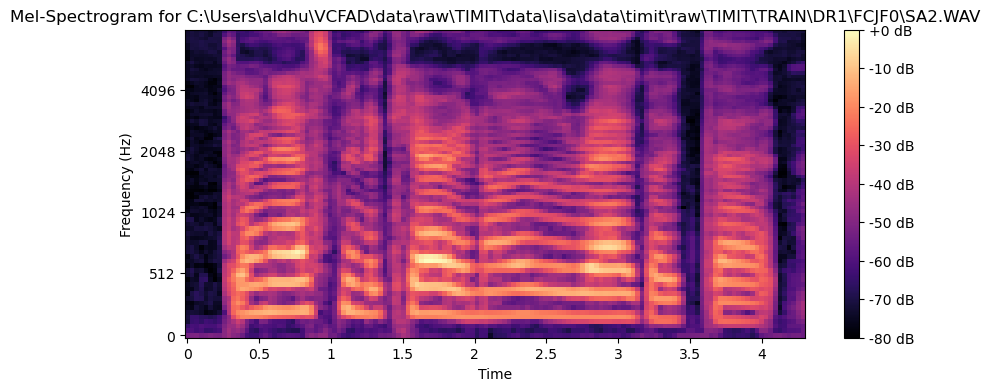

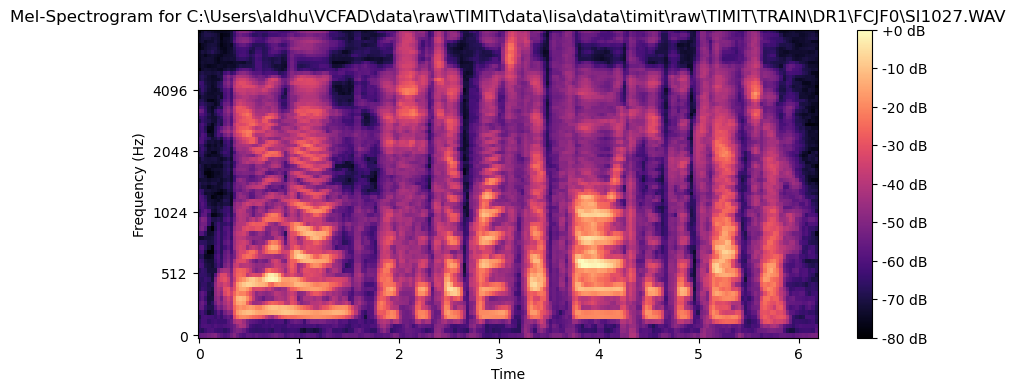

In [69]:
def plot_mel_spectrogram(mel_spectrogram, sr, title="Mel-Spectrogram"):
    """
    Plotting the mel-spectrogram.

    Args:
    - mel_spectrogram (ndarray): Mel-spectrogram to plot.
    - sr (int): Sample rate of the audio.
    - title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Visualizing the mel-spectrogram of the first few training samples
for i, (mel_spectrogram, file_path) in enumerate(train_mel_spectrograms[:3]):
    plot_mel_spectrogram(mel_spectrogram, sr=16000, title=f"Mel-Spectrogram for {file_path}")

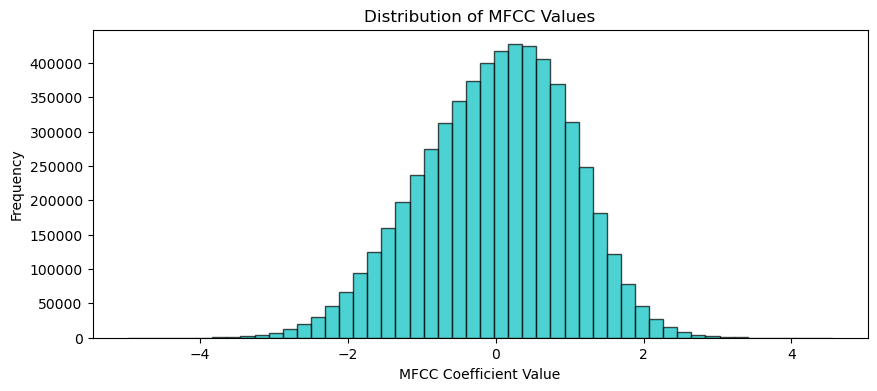

In [70]:
def plot_mfcc_distribution(mfcc_features, num_coefficients=13):
    """
    Plotting the distribution of MFCC features.

    Args:
    - mfcc_features (list): List of MFCC features.
    - num_coefficients (int): Number of MFCC coefficients to plot.
    """
    # Extracting all MFCC values for the first few coefficients
    all_mfcc_values = []
    for mfcc, _ in mfcc_features:
        all_mfcc_values.extend(mfcc.flatten())

    # Plotting histogram of the MFCC values
    plt.figure(figsize=(10, 4))
    plt.hist(all_mfcc_values, bins=50, alpha=0.7, color='c', edgecolor='black')
    plt.title("Distribution of MFCC Values")
    plt.xlabel("MFCC Coefficient Value")
    plt.ylabel("Frequency")
    plt.show()

# Visualizing the distribution of MFCC features for training data
plot_mfcc_distribution(train_features_normalized)

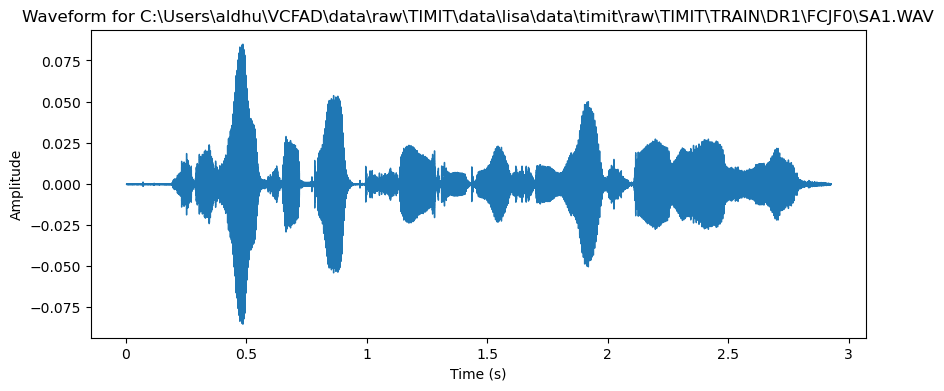

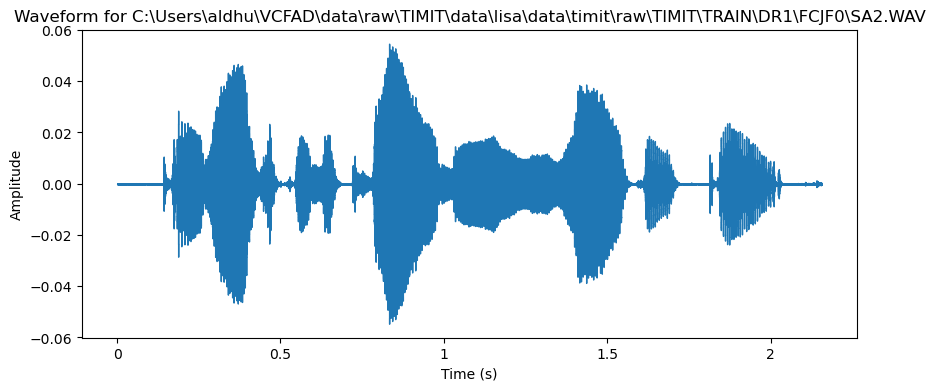

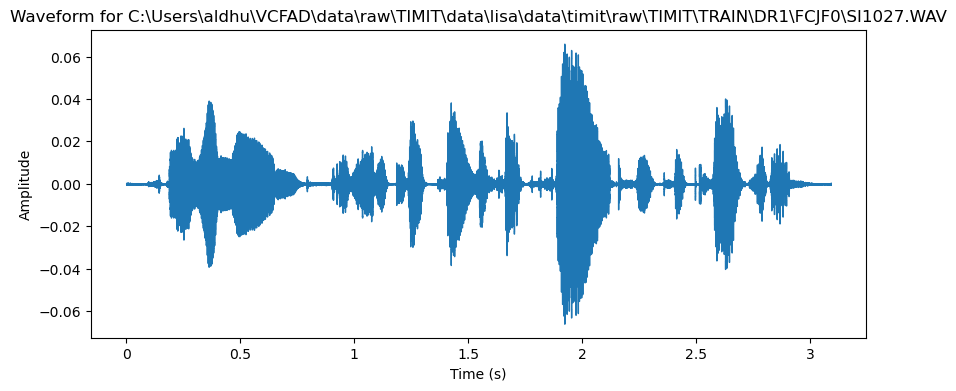

In [71]:
def plot_waveform(audio_data, sr, title="Waveform"):
    """
    Plotting the waveform of an audio file.

    Args:
    - audio_data (ndarray): The audio samples.
    - sr (int): Sample rate of the audio.
    - title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Visualizing waveforms of the first few training samples
for i, (audio, sr, file_path) in enumerate(train_audio_files[:3]):
    plot_waveform(audio, sr, title=f"Waveform for {file_path}")

In [77]:
# Defining the path to your TIMIT dataset directory
TIMIT_PATH = Path('C:/Users/aldhu/VCFAD/data/raw/TIMIT/data/lisa/data/timit/raw/TIMIT')

# Initialize a list to store metadata
metadata = []

# Looping through all files in the TIMIT dataset to create metadata
for root, dirs, files in os.walk(TIMIT_PATH):
    for file in files:
        if file.endswith(".WAV"):  # Make sure to match the correct file extension
            speaker_id = os.path.basename(root)  # Extract speaker ID from folder name
            file_path = os.path.join(root, file)  # Full path to the audio file
            metadata.append({'speaker_id': speaker_id, 'file_path': file_path})

# Creating a DataFrame from the metadata list
metadata_df = pd.DataFrame(metadata)

# Displaying some basic information about the dataset
print(f"Total audio files in TIMIT dataset: {len(metadata_df)}")
print(metadata_df.head())

Total audio files in TIMIT dataset: 6300
  speaker_id                                          file_path
0      FAKS0  C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\...
1      FAKS0  C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\...
2      FAKS0  C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\...
3      FAKS0  C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\...
4      FAKS0  C:\Users\aldhu\VCFAD\data\raw\TIMIT\data\lisa\...


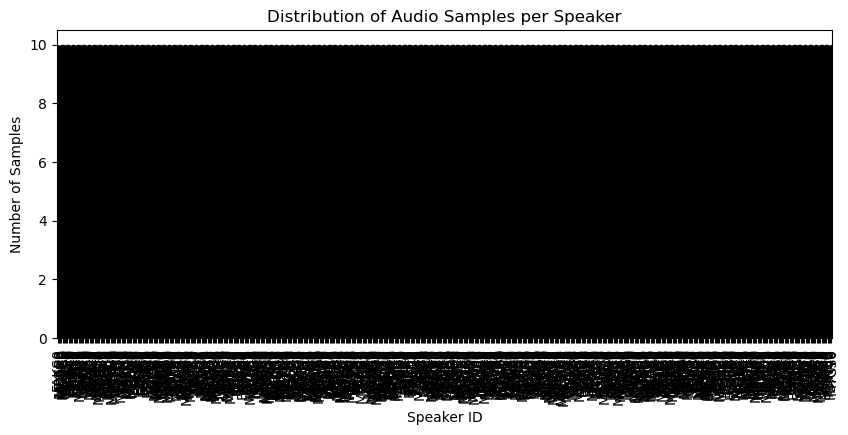

In [78]:
# Visualizing the speaker distribution for the TIMIT dataset
plot_speaker_distribution(metadata_df)

### Why These Visualizations Matter:

**1. Mel-Spectrograms and Waveforms:**
- These visualizations help you visually confirm the quality and correctness of the preprocessed audio data. By inspecting the mel-spectrograms and waveforms, you can identify any anomalies, noise, or issues that might affect the model's performance.

**2. Distribution of Features:**
- Visualizing the distribution of extracted features (like MFCCs) ensures that the data is normalized correctly. It helps detect any unexpected values or outliers that could negatively impact model training and evaluation.

**`3.` Speaker Representation:**
- Visualizing the distribution of audio samples per speaker confirms that you have a balanced dataset. A balanced dataset is crucial for training reliable voice cloning and speaker classification models, as it prevents bias toward any specific speaker and ensures more generalized results.
